In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import random

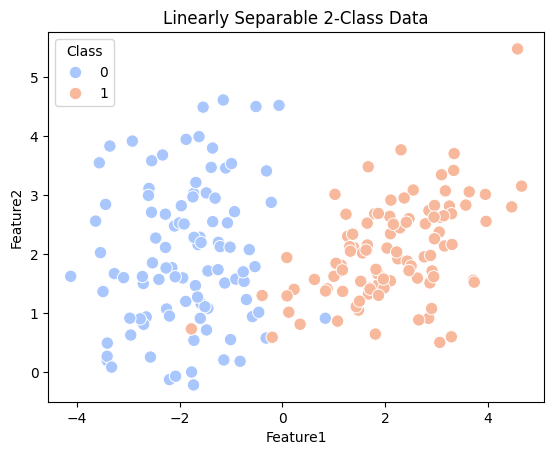

In [82]:
# Generate linear data
X, y = make_classification(
    n_samples=200,     # total samples
    n_features=2,      # only 2 features (for easy plotting)
    n_redundant=0,     # no redundant features
    n_informative=2,   # both features are informative
    n_clusters_per_class=1,
    class_sep=2.0,     # higher = easier separation
    random_state=42

)

# Convert to DataFrame for visualization
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Class'] = y

# Plot
sns.scatterplot(x='Feature1', y='Feature2', hue='Class', data=df, palette='coolwarm', s=80)
plt.title("Linearly Separable 2-Class Data")
plt.show()


In [83]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]


In [84]:
X.shape

(200, 2)

In [85]:
import numpy as np
import random

def step(x):
    return 1 if x > 0 else 0

def perceptron(X, y):
    # Add bias term
    X = np.insert(X, 0, 1, axis=1)
    lr = 0.1
    weights = np.ones(X.shape[1])

    for i in range(1000):
        j = random.randint(0, X.shape[0] - 1)  # fixed index range
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]

    return weights[0], weights[1:]


In [86]:

intercept, coef_ = perceptron(X, y)
print("Intercept:", intercept)
print("Coefficients:", coef_)


Intercept: 0.5000000000000001
Coefficients: [ 0.75034414 -0.38849826]


In [87]:
m=-(coef_[0]/coef_[1])
b=-(intercept/coef_[1])

In [88]:
X_input=np.linspace(-3,3,100)
y_input=m*X_input+b

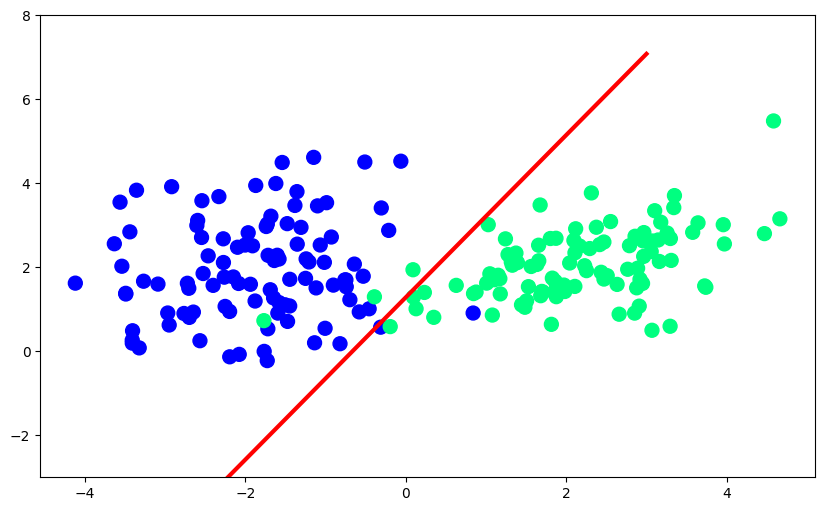

In [89]:
plt.figure(figsize=(10,6))
plt.plot(X_input, y_input, color='red', linewidth=3)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3,8)
plt.show()
